In [ ]:
!pip install datascience

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *
import pandas as pd
from datascience import *


# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)


In [ ]:
!ls /content/drive/My\ Drive/DS200Labs

 2019.csv
 2020.csv
 2021.csv
 2022.csv
 AVG_4Years.xlsx
 AVG_Ranking.csv
 baby.csv
 Ben-NE-9-10-2015-pass.csv
 breast-cancer-wisconsin-data-wind.csv
 BreatCancerFinal.csv
 CancerDiagnosis
 CancerDiagnosis.pdf
 Convert_Jupyter_Notebook_To_HTML.ipynb
 cwur2022.csv
 cwurData.csv
 Data_Cleaning.html
 Data_Cleaning.ipynb
 Data_Collection.html
 Data_Collection.ipynb
 DS200_GuestLecture_Dec1-20_SharonHuang.pdf
 faithful.csv
'First_Draft(1).ipynb'
 First_Draft.ipynb
 IMDB5000movies.csv
 IMDBReviewsSentiment.csv
 IRAhandle_tweets_1.csv
 IRIS.csv
 Lab10KakadeGaurang.html
 Lab10KakadeGaurang.ipynb
 Lab11KakadeGaurang.html
 Lab11KakadeGaurang.ipynb
 Lab12KakadeGaurang.html
 Lab12KakadeGaurang.ipynb
 Lab13KakadeGaurang.html
 Lab13KakadeGaurang.ipynb
' Lab1KakadeGaurang.html'
' Lab1KakadeGaurang.ipynb'
 Lab2KakadeGaurang.html
 Lab2KakadeGaurang.ipynb
 Lab3KakadeGaurang.html
 Lab3KakadeGaurang.ipynb
 Lab4KakadeGaurang.html
 Lab4KakadeGaurang.ipynb
 Lab5KakadeGaurang.html
 Lab5KakadeGaurang.ipynb
 La

## Analyzing World ranking of colleges in the World.

# The Relationship between Rank and Teaching score

Table of consists of rankings of top 91 colleges around the world in the year 2019.

In [ ]:
path1= "/content/drive/My Drive/DS200Labs/2019.csv"
Univrank_2019 = Table.read_table(path1)
Univrank_2019.show(25)

YEAR,Ranking,University,Country,Overall Score,Teaching Score,Research Score,Citation Score,Industry Income Score,International Outlook Score
2019,1,University of Oxford,United Kingdom,96,91.8,99.5,99.1,67,96.3
2019,2,University of Cambridge,United Kingdom,94.8,92.1,98.8,97.1,52.9,94.3
2019,3,Stanford University,United States,94.7,93.6,96.8,99.9,64.6,79.3
2019,4,Massachusetts Institute of Technology,United States,94.2,91.9,92.7,99.9,87.6,89
2019,5,California Institute of Technology,United States,94.1,94.5,97.2,99.2,88.2,62.3
2019,6,Harvard University,United States,93.6,90.1,98.4,99.6,48.7,79.7
2019,7,Princeton University,United States,92.3,89.9,93.6,99.4,57.3,80.1
2019,8,Yale University,United States,91.3,91.6,93.5,97.8,51.5,68.3
2019,9,Imperial College London,United Kingdom,90.3,85.8,87.7,97.8,67.3,97.1
2019,10,The University of Chicago,United States,90.2,90.2,90.1,99,41.4,70.9


Source: Times Higher Education Rankings 2019"

https://www.timeshighereducation.com/world-university-rankings/2019/world-ranking




#### General Statistics:

In [ ]:
Univrank_2019.stats()

statistic,YEAR,Ranking,University,Country,Overall Score,Teaching Score,Research Score,Citation Score,Industry Income Score,International Outlook Score
min,2019,1,Australian National University,Australia,62.4,40.6,39.7,55,34.8,31.1
max,2019,99,École Polytechnique Fédérale de Lausanne,United States,96,94.5,99.5,99.9,100,99.7
median,2019,44,,,73.7,63.2,70.4,93.2,54.1,71.8
sum,183729,4285,,,6821.3,5966.8,6433.7,8212.4,5595.2,6628


## Number of universities from each country in the Year 2019

In [ ]:
Univ_totals = Univrank_2019.group('Country')
Univ_totals.sort('count', descending = True).show()

Country,count
United States,38
United Kingdom,11
Netherlands,7
Germany,6
Australia,5
Canada,5
China,3
Hong Kong,3
Switzerland,3
France,2


## Isolating the columns of Interest

## Ranking and Teaching score

In [ ]:
RankByTS = Univrank_2019.select('Ranking','University ', 'Teaching Score')
RankByTS.show(15)


Ranking,University,Teaching Score
1,University of Oxford,91.8
2,University of Cambridge,92.1
3,Stanford University,93.6
4,Massachusetts Institute of Technology,91.9
5,California Institute of Technology,94.5
6,Harvard University,90.1
7,Princeton University,89.9
8,Yale University,91.6
9,Imperial College London,85.8
10,The University of Chicago,90.2


## Teaching Score Bar Chart

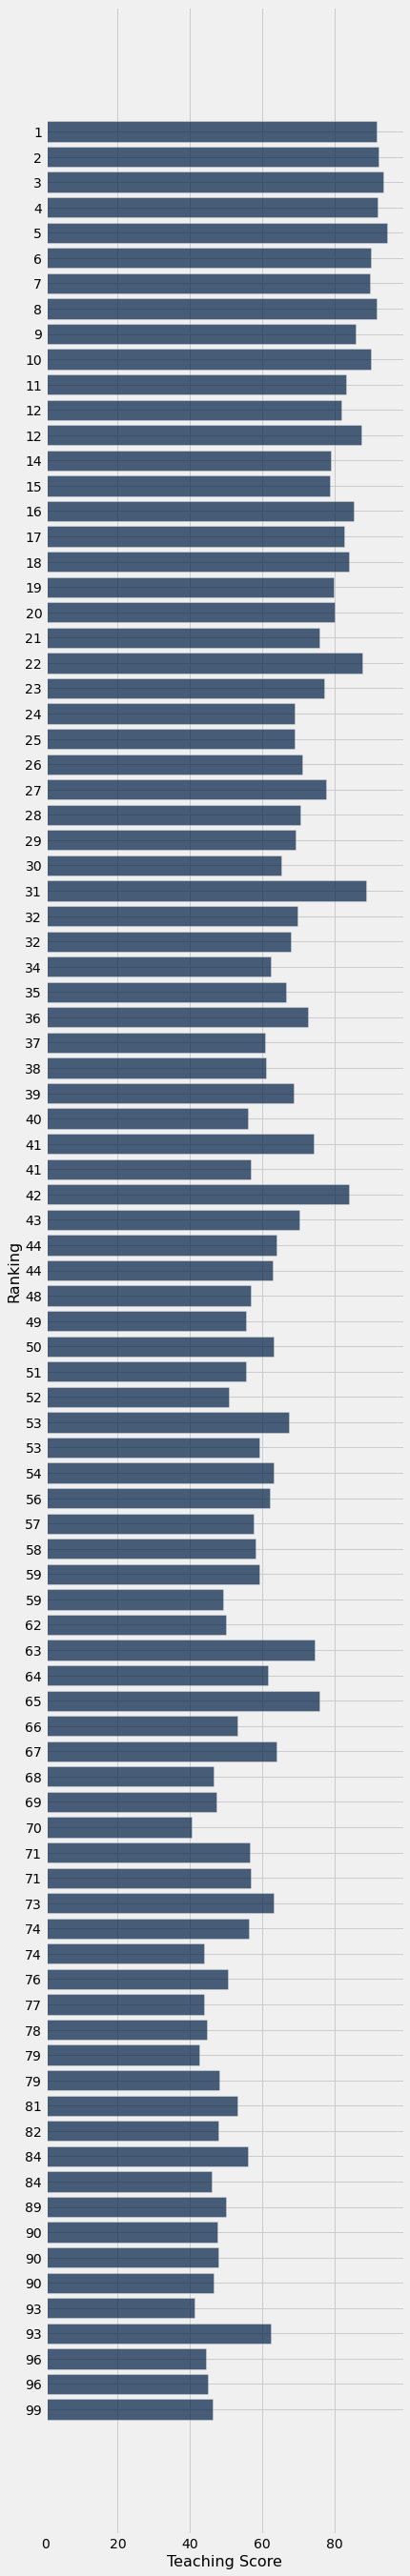

In [ ]:
RankByTS_BarChart = RankByTS.barh("Ranking", "Teaching Score")

## Scatter Plot for Ranking Vs Teaching score

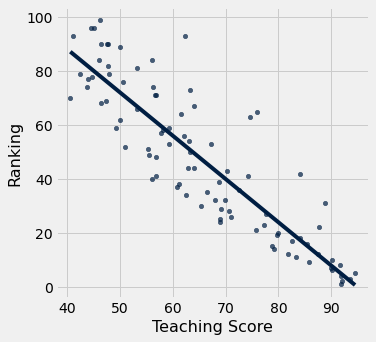

In [ ]:
RankByTS.scatter('Teaching Score', 'Ranking', fit_line = True)

## Ranking and Research score

In [ ]:
RankByRS = Univrank_2019.select('Ranking', 'University ', 'Research Score')
RankByRS.sort('Research Score', descending = True).show(15)

Ranking,University,Research Score
1,University of Oxford,99.5
2,University of Cambridge,98.8
6,Harvard University,98.4
5,California Institute of Technology,97.2
3,Stanford University,96.8
22,Tsinghua University,94.1
7,Princeton University,93.6
8,Yale University,93.5
4,Massachusetts Institute of Technology,92.7
15,"University of California, Berkeley",92.3


## Research Score Bar Chart

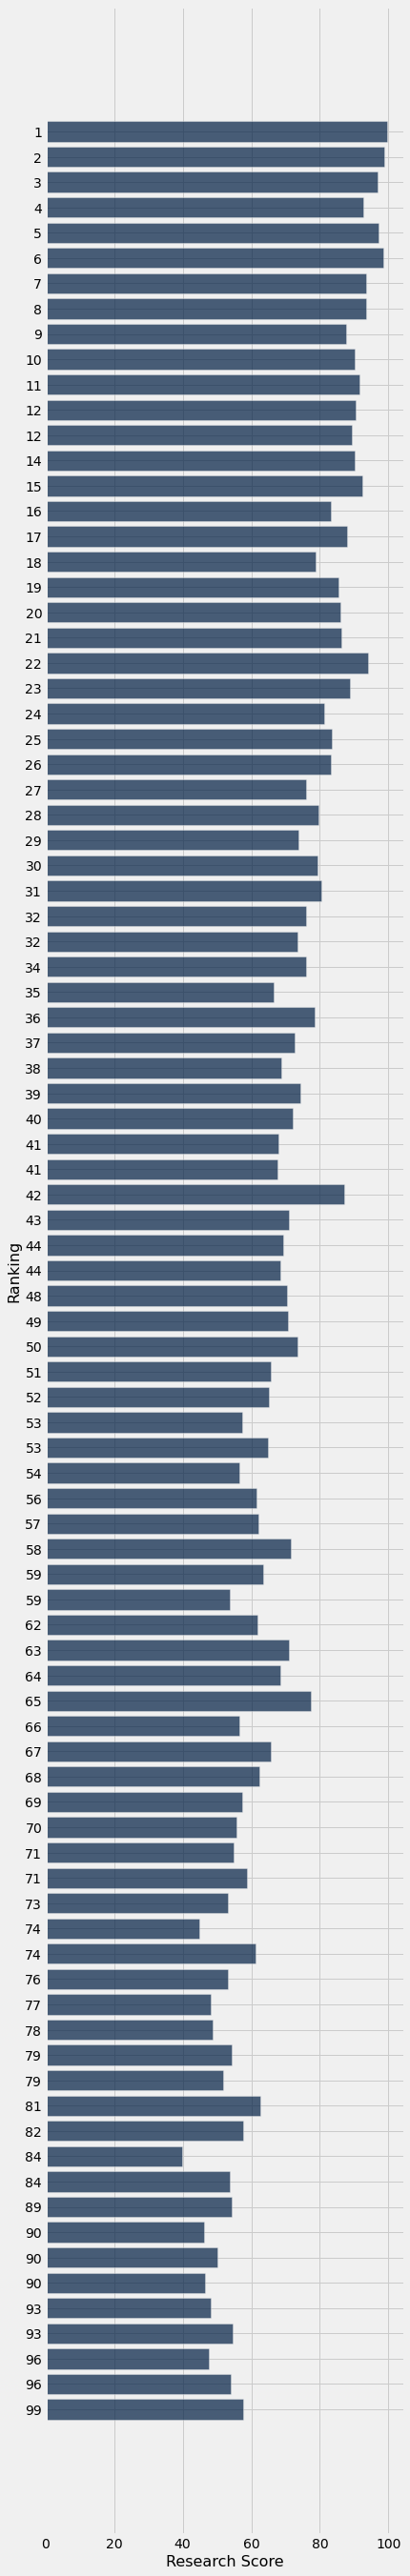

In [ ]:
RankByRS_BarChart = RankByRS.barh("Ranking", "Research Score")

## Scatter Plot for Ranking Vs Research Score

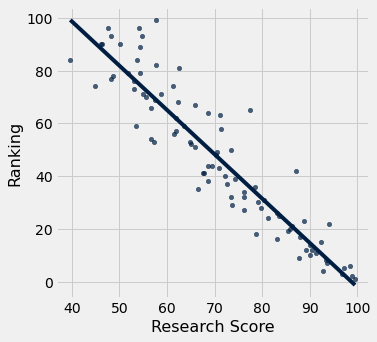

In [ ]:
RankByRS.scatter('Research Score', 'Ranking', fit_line = True)

## Ranking and Industry Income Score

In [ ]:
RankByIIS = Univrank_2019.select('Ranking', 'University ', 'Industry Income Score')
RankByIIS.sort('Industry Income Score', descending = True).show(15)

Ranking,University,Industry Income Score
18,Duke University,100
32,LMU Munich,100
44,Technical University of Munich,100
59,Wageningen University & Research,100
76,University of Freiburg,100
48,KU Leuven,99.9
22,Tsinghua University,99.8
58,Delft University of Technology,99.6
30,"University of California, San Diego",96
65,Kyoto University,95.6


## Industry Income Score Bar Chart

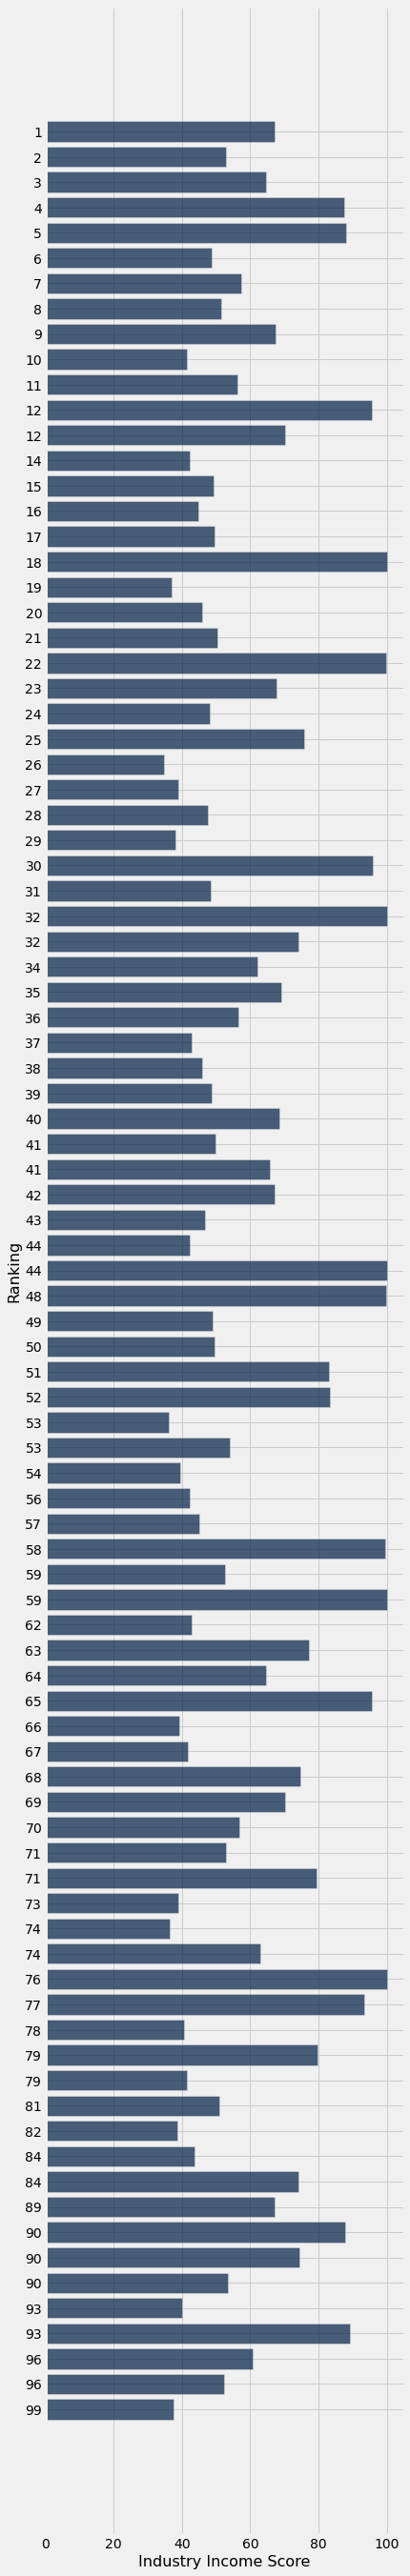

In [ ]:
RankByIIS_BarChart = RankByIIS.barh("Ranking", "Industry Income Score")

## Scatter Plot for Ranking Vs Industry Income Score

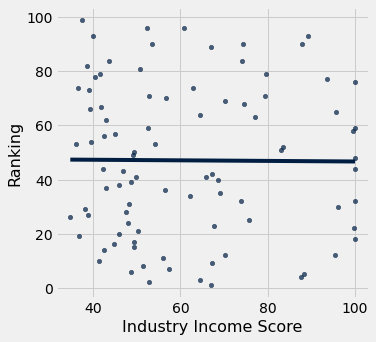

In [ ]:
RankByIIS.scatter('Industry Income Score', 'Ranking', fit_line = True)

## Reading in 2020 World Ranking Data

In [ ]:
path2= "/content/drive/My Drive/DS200Labs/2020.csv"
Univrank_2020 = Table.read_table(path2)
Univrank_2020.show(25)

YEAR,Ranking,University,Country,Overall Score,Teaching Score,Research Score,Citation Score,Industry Income Score,International Outlook Score
2020,1,University of Oxford,United Kingdom,95.4,90.5,99.6,98.4,65.5,96.4
2020,2,California Institute of Technology,United States,94.5,92.1,97.2,97.9,88,82.5
2020,3,University of Cambridge,United Kingdom,94.4,91.4,98.7,95.8,59.3,95
2020,4,Stanford University,United States,94.3,92.8,96.4,99.9,66.2,79.5
2020,5,Massachusetts Institute of Technology,United States,93.6,90.5,92.4,99.5,86.9,89
2020,6,Princeton University,United States,93.2,90.3,96.3,98.8,58.6,81.1
2020,7,Harvard University,United States,93,89.2,98.6,99.1,47.3,76.3
2020,8,Yale University,United States,91.7,92,94.8,97.3,52.4,68.7
2020,9,The University of Chicago,United States,90.2,89.1,91.4,96.7,52.7,76
2020,10,Imperial College London,United Kingdom,89.8,84.5,87.6,97,69.9,97.1


## Reading in 2021 World Ranking Data

In [ ]:
path3= "/content/drive/My Drive/DS200Labs/2021.csv"
Univrank_2021 = Table.read_table(path3)
Univrank_2021.show(25)

YEAR,Ranking,University,Country,Overall Score,Teaching Score,Reseach Score,Citation Score,Industry Income Score,International Outlook Score
2021,1,University of Oxford,United Kingdom,95.6,91.3,99.6,98,68.7,96.4
2021,2,Stanford University,United States,94.9,92.2,96.7,99.9,90.1,79.5
2021,3,Harvard University,United States,94.8,94.4,98.8,99.4,46.8,77.7
2021,4,California Institute of Technology,United States,94.5,92.5,96.9,97,92.7,83.6
2021,5,Massachusetts Institute of Technology,United States,94.4,90.7,94.4,99.7,90.4,90
2021,6,University of Cambridge,United Kingdom,94,90.3,99.2,95.6,52.1,95.7
2021,7,"University of California, Berkeley",United States,92.2,85.8,97.2,99.1,84.3,72.3
2021,8,Yale University,United States,91.6,91.9,93.8,97.9,56.1,68.4
2021,9,Princeton University,United States,91.5,88.8,92.5,98.9,58,80.2
2021,10,The University of Chicago,United States,90.3,88.9,90.5,98.6,54.9,74


## Reading in 2022 World Ranking Data

In [ ]:
path4= "/content/drive/My Drive/DS200Labs/2022.csv"
Univrank_2022 = Table.read_table(path4)
Univrank_2022.show(25)

YEAR,Ranking,University,Country,Overall Score,Teaching Score,Reseach Score,Citation Score,Industry Income Score,International Outlook Score
2022,1,University of Oxford,United Kingdom,95.7,91,99.6,98,74.4,96.3
2022,2,California Institute of Technology,United States,95,93.6,96.9,97.8,90.4,83.8
2022,2,Harvard University,United States,95,94.5,98.9,99.2,48.9,79.8
2022,4,Stanford University,United States,94.9,92.3,96.8,99.9,91,79.7
2022,5,Massachusetts Institute of Technology,United States,94.6,90.9,94.4,99.7,93.7,89.9
2022,5,University of Cambridge,United Kingdom,94.6,90.9,99.5,96.2,56.7,95.8
2022,7,Princeton University,United States,93.6,89.5,96,99,88.8,80.7
2022,8,"University of California, Berkeley",United States,92.2,85.7,96,99.1,84.7,77.6
2022,9,Yale University,United States,90.8,90.7,93,97,56.2,69.9
2022,10,The University of Chicago,United States,89.8,87.2,90.6,98.3,56.3,74.4


## Reading in the Average of World Ranking for 4 years (2019,2020,2021,2022)

In [ ]:
path5= "/content/drive/My Drive/DS200Labs/AVG_Ranking.csv"
Univrank_AVG = Table.read_table(path5)
Univrank_AVG.show(25)

Average of University Ranking,University,Country,Average of Overall Score,Average of Teaching Score,Average of Research Score,Average of Citation Score,Industry Income Score,Average of International Outlook Score
1,University of Oxford,United Kingdom,95.675,91.15,99.575,98.375,68.9,96.35
3.25,California Institute of Technology,United States,94.525,93.175,97.05,97.975,89.825,78.05
3.25,Stanford University,United States,94.7,92.725,96.675,99.9,77.975,79.5
4,University of Cambridge,United Kingdom,94.45,91.175,99.05,96.175,55.25,95.2
4.5,Harvard University,United States,94.1,92.05,98.675,99.325,47.925,78.375
4.75,Massachusetts Institute of Technology,United States,94.2,91,93.475,99.7,89.65,89.475
7.25,Princeton University,United States,92.65,89.625,94.6,99.025,65.675,80.525
8.25,Yale University,United States,91.35,91.55,93.775,97.5,54.05,68.825
9.75,The University of Chicago,United States,90.125,88.85,90.65,98.15,51.325,73.825
10.5,Imperial College London,United Kingdom,89.7,83.5,87.95,97.4,69.4,97.275


# Correlation

## Checking Correlation between Average Ranking and Average Teaching Score (AVG_Ranking.csv)

In [ ]:
Ranking_TeachingScore = Univrank_AVG.select('Average of University  Ranking', 'Average of Teaching Score' )
Ranking_TeachingScore.show(20)

Average of University Ranking,Average of Teaching Score
1,91.15
3.25,93.175
3.25,92.725
4,91.175
4.5,92.05
4.75,91
7.25,89.625
8.25,91.55
9.75,88.85
10.5,83.5


## Convert the two-column table into a DataFrame, using .to_df method of Tables.

In [ ]:
Ranking_TeachingScore_DF = Ranking_TeachingScore.to_df()
Ranking_TeachingScore_DF.shape


(91, 2)

In [ ]:
Ranking_TeachingScore_DF.corr()

,Average of University Ranking,Average of Teaching Score
Average of University Ranking,1.000000,-0.881177
Average of Teaching Score,-0.881177,1.000000


## Checking Correlation between Average Ranking and Average Research Score

In [ ]:
Ranking_ResearchScore = Univrank_AVG.select('Average of University  Ranking', 'Average of Research Score' )
Ranking_ResearchScore.show(20)

Average of University Ranking,Average of Research Score
1,99.575
3.25,97.05
3.25,96.675
4,99.05
4.5,98.675
4.75,93.475
7.25,94.6
8.25,93.775
9.75,90.65
10.5,87.95


## Convert the two-column table into a DataFrame, using .to_df method of Tables.

In [ ]:
Ranking_ResearchScore_DF = Ranking_ResearchScore.to_df()
Ranking_ResearchScore_DF.shape

(91, 2)

In [ ]:
Ranking_ResearchScore_DF.corr()

,Average of University Ranking,Average of Research Score
Average of University Ranking,1.000000,-0.923396
Average of Research Score,-0.923396,1.000000


## Checking Correlation between Average Ranking and Average Industry Income Score

In [ ]:
Ranking_IndustryIncomeScore = Univrank_AVG.select('Average of University  Ranking', 'Industry Income Score' )
Ranking_IndustryIncomeScore.show(20)

Average of University Ranking,Industry Income Score
1,68.9
3.25,89.825
3.25,77.975
4,55.25
4.5,47.925
4.75,89.65
7.25,65.675
8.25,54.05
9.75,51.325
10.5,69.4


## Convert the two-column table into a DataFrame, using .to_df method of Tables.

In [ ]:
Ranking_IndustryIncomeScore_DF = Ranking_IndustryIncomeScore.to_df()
Ranking_IndustryIncomeScore_DF.shape

(91, 2)

In [ ]:
Ranking_IndustryIncomeScore_DF.corr()

,Average of University Ranking,Industry Income Score
Average of University Ranking,1.000000,-0.084469
Industry Income Score,-0.084469,1.000000


# Data Loading

In [ ]:
import pandas as pd


dataframe1 = pd.read_excel("/content/drive/My Drive/DS200Labs/Revised2021Data.xlsx")

In [ ]:
dataframe2 = pd.read_excel("/content/drive/My Drive/DS200Labs/Revised2023Data.xlsx")
dataframe3 = pd.read_excel("/content/drive/My Drive/DS200Labs/Revised2020Data.xlsx")

dataframe5 = pd.read_excel("/content/drive/My Drive/DS200Labs/Revised2022Data.xlsx")

In [ ]:
df = pd.concat([dataframe1,dataframe2,dataframe3,dataframe5],axis=0)

In [ ]:
df_2023 = df[df['Year']==2023]

In [ ]:
dataframe = df[df['Year']!=2023]

In [ ]:
dataframe.head()

,Year,Ranking,University,Country,Overall Score,Teaching Score,Research Score,Citations Score,Industy Income Score,International Outlook Score
0,2021,1,University of Oxford,United Kingdom,95.6,91.3,99.6,98.0,68.7,96.4
1,2021,2,Stanford University,United States,94.9,92.2,96.7,99.9,90.1,79.5
2,2021,3,Harvard University,United States,94.8,94.4,98.8,99.4,46.8,77.7
3,2021,4,California Institute of Technology,United States,94.5,92.5,96.9,97.0,92.7,83.6
4,2021,5,Massachusetts Institute of Technology,United States,94.4,90.7,94.4,99.7,90.4,90.0


In [ ]:
dataframe.columns

Index(['Year', 'Ranking ', 'University', 'Country', 'Overall Score',
       'Teaching Score', 'Research Score', 'Citations Score',
       'Industy Income Score', 'International Outlook Score'],
      dtype='object')

In [ ]:
dataframe['Ranking '].describe()

count    604.000000
mean     100.738411
std       57.964658
min        1.000000
25%       51.000000
50%      101.000000
75%      151.000000
max      200.000000
Name: Ranking , dtype: float64

In [ ]:
features = ['Overall Score', 	'Teaching Score', 	'Research Score' 	,'Citations Score', 	'Industy Income Score', 	'International Outlook Score']

labels = []

for i in dataframe['Ranking ']:
  if(i<=20):
    labels.append('High')
  if(i>20 and i<=50):
    labels.append('Medium')
  if(i>50):
    labels.append('Low')

In [ ]:
features = dataframe.drop(['Ranking ','Year','University','Country'],axis=1)
label_data = labels

In [ ]:
features['Overall Score'] = features['Overall Score'].replace('50.1–53.7','50')

In [ ]:
features['Overall Score'] = features['Overall Score'].replace('50.4–53.9','52')

In [ ]:
features

,Overall Score,Teaching Score,Research Score,Citations Score,Industy Income Score,International Outlook Score
0,95.6,91.3,99.6,98.0,68.7,96.4
1,94.9,92.2,96.7,99.9,90.1,79.5
2,94.8,94.4,98.8,99.4,46.8,77.7
3,94.5,92.5,96.9,97.0,92.7,83.6
4,94.4,90.7,94.4,99.7,90.4,90.0
...,...,...,...,...,...,...
197,54,34.4,33.6,83.1,51.6,98.6
198,54,34.4,31.2,97.5,48.5,51.4
199,54,51.5,41.7,70.9,55.9,44.3
200,54,56.5,38.6,67.8,36.9,55.4


# Label Encoding


In [ ]:
from sklearn import preprocessing

# Encoding label
le = preprocessing.LabelEncoder()

y = le.fit_transform(label_data)


In [ ]:
print("Original form is ", le.classes_)
print("Encoded labels are ", [0,1,2]," respectively")


Original form is  ['High' 'Low' 'Medium']
Encoded labels are  [0, 1, 2]  respectively


# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,y,random_state=15,shuffle=True,train_size=0.80)


X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)


# Machine Learning models Models

In [ ]:
# libraris
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

## Logistic Regression Model

In [ ]:
# Logistice Regression Model
lrModel = LogisticRegression().fit(X_train, y_train)

# dataset prediction
y_pred = lrModel.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### K Fold cross validation and metrics

In [ ]:
from sklearn.model_selection import StratifiedKFold

strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []
scores_training = []
for k, (train, test) in enumerate(kfold):
  lrModel.fit(X_train.iloc[train, :], y_train.iloc[train])
  score = lrModel.score(X_train.iloc[test, :], y_train.iloc[test])

  sc_train = lrModel.score(X_train.iloc[train, :], y_train.iloc[train])
  scores.append(score)
  scores_training.append(sc_train)
  # print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))

print('\n\nCross-Validation Testing accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('\n\nCross-Validation Training accuracy: %.3f +/- %.3f' %(np.mean(scores_training), np.std(scores_training)))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 



Cross-Validation Testing accuracy: 0.876 +/- 0.065


Cross-Validation Training accuracy: 0.881 +/- 0.050


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))



Cross-Validation accuracy: 0.876 +/- 0.065


In [ ]:
# accuracy score
accLRModel = accuracy_score(y_test,y_pred)
print("Accuracy Score : ", accLRModel)

Accuracy Score :  0.826446280992


In [ ]:
report = classification_report(y_test, y_pred)

print(report)

# f1 score metrics
f1_score_value = f1_score(y_test,y_pred,average='weighted')
print("F1 score : ", f1_score_value)

# precision metrics
precision_score_value = precision_score(y_test,y_pred,average='weighted')
print("Precision score : ", precision_score_value)


              precision    recall  f1-score   support

           0       0.53      0.82      0.64        11
           1       0.90      0.94      0.92        94
           2       0.50      0.19      0.27        16

    accuracy                           0.83       121
   macro avg       0.64      0.65      0.61       121
weighted avg       0.81      0.83      0.81       121

F1 score :  0.806625881006
Precision score :  0.811832170885


### Logistic regression feature importance

In [ ]:
# feature importance based on logistic regression model

from sklearn.inspection import permutation_importance
feature_score_logistic_reg = permutation_importance(lrModel, X_train, y_train, n_repeats=10,
                           random_state=0)
logistic_feature_score = pd.Series(feature_score_logistic_reg.importances_mean, index=['Overall Score', 	'Teaching Score', 	'Research Score' 	,'Citations Score', 	'Industy Income Score', 	'International Outlook Score'])

logistic_feature_score

Overall Score                  0.293582
Teaching Score                 0.502692
Research Score                 0.543271
Citations Score                0.359627
Industy Income Score           0.088613
International Outlook Score    0.213458
dtype: float64

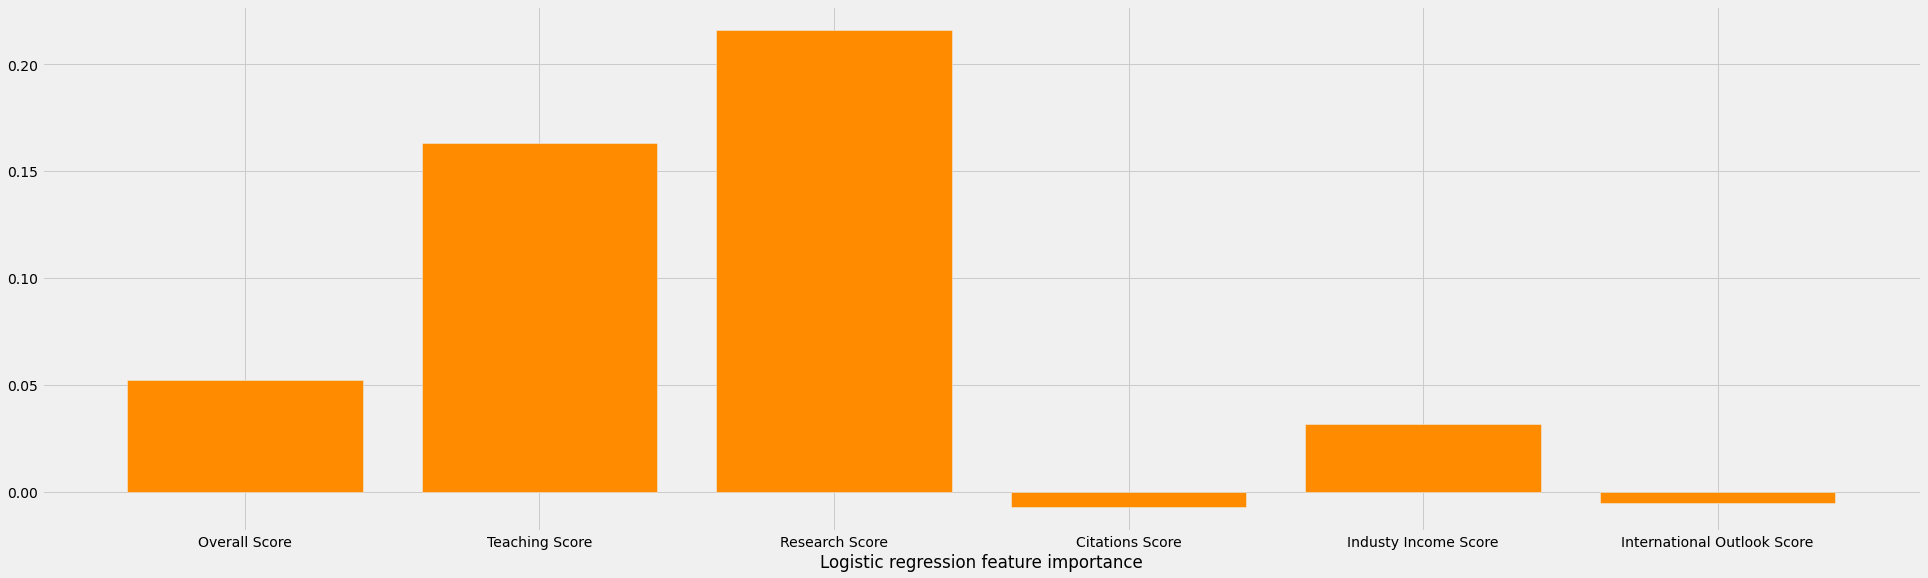

In [ ]:
# plotting feature importance of the decision_tree

plt.figure(figsize=(30, 9))
plt.bar(logistic_feature_score.index,logistic_feature_score,color = "darkorange")
plt.xlabel("Logistic regression feature importance")

plt.show()


## Hyper parameter tuning of LR

In [ ]:
#https://chrisalbon.com/code/machine_learning/model_selection/hyperparameter_tuning_using_random_search/
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
penaltyParams = ['l1', 'l2']
C = uniform(loc=0, scale=4)

hyper_parameters_dict = dict(C=C, penalty=penaltyParams)
lrModel = LogisticRegression()


clf = RandomizedSearchCV(lrModel, hyper_parameters_dict, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [ ]:
best_model = clf.fit(features, y)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
230 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
230 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solve

In [ ]:
# dataset prediction
y_pred = best_model.predict(X_test)
# Training data prediction
y_pred_train = best_model.predict(X_train)

### K Fold cross validation and metrics

In [ ]:
from sklearn.model_selection import StratifiedKFold

strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []
scores_training = []
for k, (train, test) in enumerate(kfold):
  best_model.fit(X_train.iloc[train, :], y_train.iloc[train])
  score = best_model.score(X_train.iloc[test, :], y_train.iloc[test])

  sc_train = clf.score(X_train.iloc[train, :], y_train.iloc[train])
  scores.append(score)
  scores_training.append(sc_train)
  # print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))

print('\n\nCross-Validation Testing accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('\n\nCross-Validation Training accuracy: %.3f +/- %.3f' %(np.mean(scores_training), np.std(scores_training)))

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
230 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
230 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solve



Cross-Validation Testing accuracy: 0.878 +/- 0.057


Cross-Validation Training accuracy: 0.880 +/- 0.046


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
230 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
230 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solve

In [ ]:

print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))



Cross-Validation accuracy: 0.878 +/- 0.057


In [ ]:
#accuracy of model
from sklearn.metrics import accuracy_score, confusion_matrix

print("Testing accuracy " ,accuracy_score(y_test,y_pred))

print("Training accuracy " ,accuracy_score(y_train,y_pred_train))


Testing accuracy  0.834710743802
Training accuracy  0.863354037267


In [ ]:
report = classification_report(y_test, y_pred)

print(report)

# f1 score metrics
f1_score_value = f1_score(y_test,y_pred,average='weighted')
print("F1 score : ", f1_score_value)

# precision metrics
precision_score_value = precision_score(y_test,y_pred,average='weighted')
print("Precision score : ", precision_score_value)


              precision    recall  f1-score   support

           0       0.56      0.82      0.67        11
           1       0.91      0.95      0.93        94
           2       0.43      0.19      0.26        16

    accuracy                           0.83       121
   macro avg       0.63      0.65      0.62       121
weighted avg       0.81      0.83      0.82       121

F1 score :  0.815314708348
Precision score :  0.813322229718


### Logistic regression feature importance

In [ ]:
# feature importance based on logistic regression model

from sklearn.inspection import permutation_importance
feature_score_logistic_reg = permutation_importance(best_model, X_train, y_train, n_repeats=10,
                           random_state=0)
logistic_feature_score = pd.Series(feature_score_logistic_reg.importances_mean, index=['Overall Score', 	'Teaching Score', 	'Research Score' 	,'Citations Score', 	'Industy Income Score', 	'International Outlook Score'])

logistic_feature_score

Overall Score                  0.052174
Teaching Score                 0.163147
Research Score                 0.215942
Citations Score               -0.007453
Industy Income Score           0.031470
International Outlook Score   -0.005383
dtype: float64

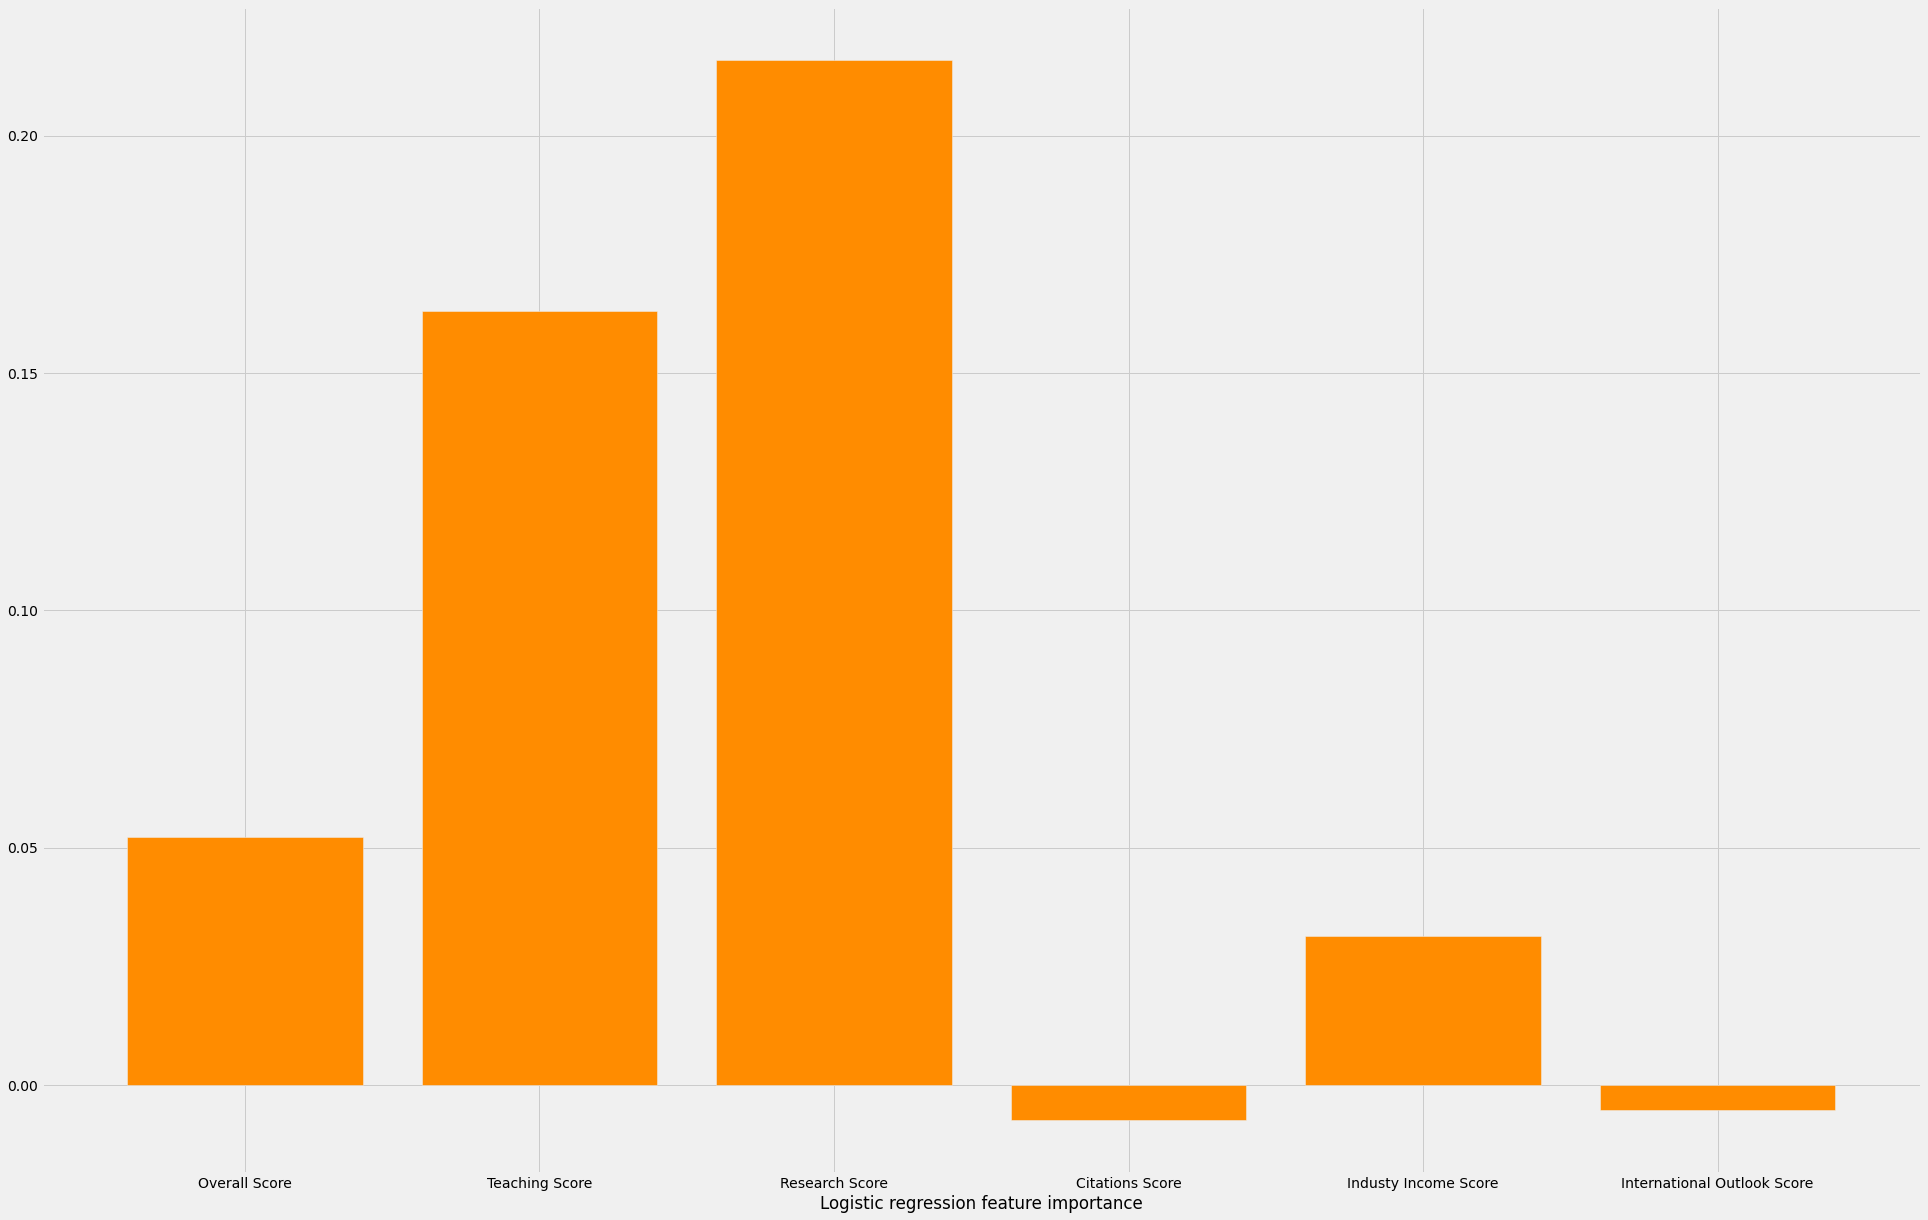

In [ ]:
# plotting feature importance of the decision_tree

plt.figure(figsize=(30,20))
plt.bar(logistic_feature_score.index,logistic_feature_score,color = "darkorange")
plt.xlabel("Logistic regression feature importance")

plt.show()


## Decision tree Model

In [ ]:
# Decision Tree Model
X_train_dt = X_train.drop(['Overall Score'],axis=1)
X_test_dt = X_test.drop(['Overall Score'],axis=1)

dtModel = DecisionTreeClassifier()
dtModel.fit(X_train_dt,y_train)

# predicting the test dataset
y_pred = dtModel.predict(X_test_dt)

### K Fold cross validation and metrics

In [ ]:
from sklearn.model_selection import StratifiedKFold

# 10 Fold Cross validation
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train_dt, y_train)
scores = []
scores_training =[]
for k, (train, test) in enumerate(kfold):
  dtModel.fit(X_train_dt.iloc[train, :], y_train.iloc[train])
  score = dtModel.score(X_train_dt.iloc[test, :], y_train.iloc[test])

  sc_train = dtModel.score(X_train_dt.iloc[train, :], y_train.iloc[train])
  scores.append(score)
  scores_training.append(sc_train)
  # print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))

print('\n\nCross-Validation Testing accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('\n\nCross-Validation Training accuracy: %.3f +/- %.3f' %(np.mean(scores_training), np.std(scores_training)))



Cross-Validation Testing accuracy: 0.967 +/- 0.025


Cross-Validation Training accuracy: 1.000 +/- 0.000


In [ ]:

print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))



Cross-Validation accuracy: 0.967 +/- 0.025


In [ ]:
# accuracy score
accLRModel = accuracy_score(y_test,y_pred)
print("Accuracy Score : ", accLRModel)

Accuracy Score :  0.99173553719


In [ ]:
report = classification_report(y_test, y_pred)

print(report)

# f1 score metrics
f1_score_value = f1_score(y_test,y_pred,average='weighted')
print("F1 score : ", f1_score_value)

# precision metrics
precision_score_value = precision_score(y_test,y_pred,average='weighted')
print("Precision score : ", precision_score_value)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.99      1.00      0.99        94
           2       1.00      0.94      0.97        16

    accuracy                           0.99       121
   macro avg       1.00      0.98      0.99       121
weighted avg       0.99      0.99      0.99       121

F1 score :  0.991624103061
Precision score :  0.991822531535


### Decision tree feature importance

In [ ]:
dt_feature_imp = pd.Series(dtModel.feature_importances_, index=['Teaching Score', 	'Research Score' 	,'Citations Score', 	'Industy Income Score', 	'International Outlook Score']).sort_values(ascending=False)

dt_feature_imp

Research Score                 0.613989
Teaching Score                 0.229509
Citations Score                0.149053
International Outlook Score    0.007449
Industy Income Score           0.000000
dtype: float64

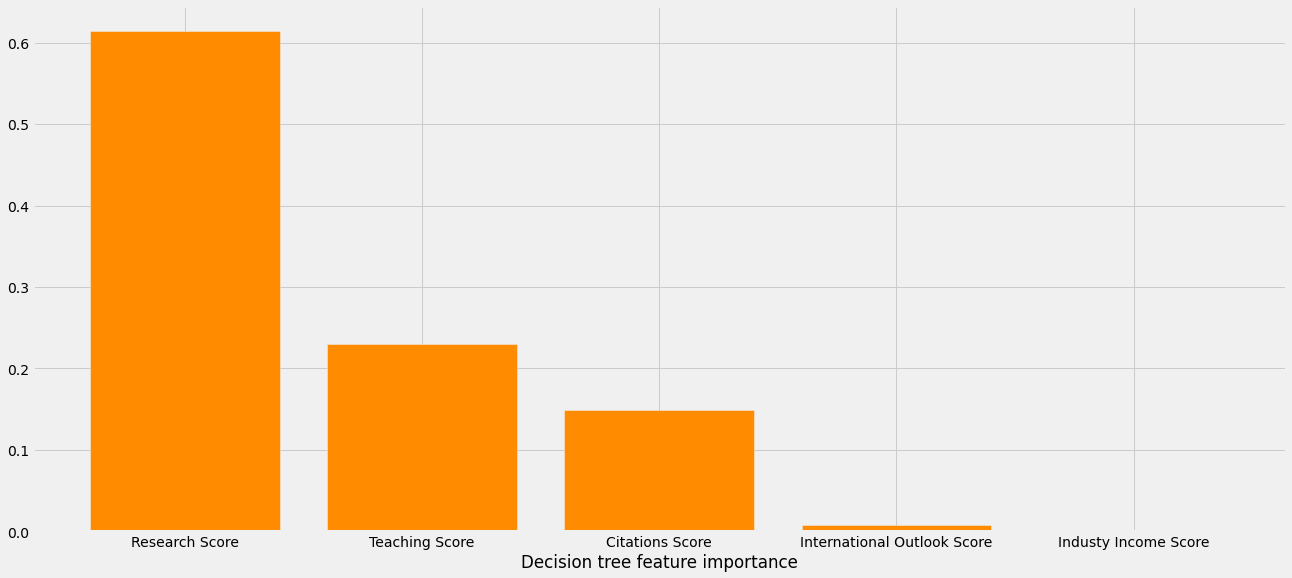

In [ ]:
# plotting feature importance of the decision_tree

plt.figure(figsize=(20, 9))
plt.bar(dt_feature_imp.index,dt_feature_imp, color = "darkorange")
plt.xlabel("Decision tree feature importance")

plt.show()


## Hyper parameter tuning

In [ ]:
from scipy.stats import randint

from sklearn.model_selection import RandomizedSearchCV
dtModel = DecisionTreeClassifier()

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

best_model = RandomizedSearchCV(dtModel,
                        param_distributions=params,
                        n_iter=2,
                        cv=3,
                        n_jobs=-1,
                        )

best_model_dt = best_model.fit(X_train_dt, y_train)

In [ ]:
best_model_dt.best_params_

{'min_samples_leaf': 5, 'max_depth': 3, 'criterion': 'gini'}

In [ ]:
# predicting the test dataset
y_pred = best_model_dt.predict(X_test_dt)

y_pred_train = best_model_dt.predict(X_train_dt)

### K Fold cross validation and metrics

In [ ]:
from sklearn.model_selection import StratifiedKFold

# 10 Fold Cross validation
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train_dt, y_train)
scores = []
scores_training =[]
for k, (train, test) in enumerate(kfold):
  best_model_dt.fit(X_train_dt.iloc[train, :], y_train.iloc[train])
  score = best_model_dt.score(X_train_dt.iloc[test, :], y_train.iloc[test])

  sc_train = best_model_dt.score(X_train_dt.iloc[train, :], y_train.iloc[train])
  scores.append(score)
  scores_training.append(sc_train)
  # print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))

print('\n\nCross-Validation Testing accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('\n\nCross-Validation Training accuracy: %.3f +/- %.3f' %(np.mean(scores_training), np.std(scores_training)))



Cross-Validation Testing accuracy: 0.923 +/- 0.026


Cross-Validation Training accuracy: 0.949 +/- 0.011


In [ ]:

print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))



Cross-Validation accuracy: 0.923 +/- 0.026


In [ ]:
#accuracy of model
from sklearn.metrics import accuracy_score, confusion_matrix

print("Testing accuracy " ,accuracy_score(y_test,y_pred))

print("Training accuracy " ,accuracy_score(y_train,y_pred_train))


Testing accuracy  0.95041322314
Training accuracy  0.968944099379


In [ ]:
report = classification_report(y_test, y_pred)

print(report)

# f1 score metrics
f1_score_value = f1_score(y_test,y_pred,average='weighted')
print("F1 score : ", f1_score_value)

# precision metrics
precision_score_value = precision_score(y_test,y_pred,average='weighted')
print("Precision score : ", precision_score_value)


              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.95      1.00      0.97        94
           2       0.92      0.69      0.79        16

    accuracy                           0.95       121
   macro avg       0.96      0.87      0.90       121
weighted avg       0.95      0.95      0.95       121

F1 score :  0.947209800719
Precision score :  0.949745387762


### Decision tree feature importance

In [ ]:
best_model_dt.best_params_

{'min_samples_leaf': 5, 'max_depth': 2, 'criterion': 'entropy'}

In [ ]:
dt = DecisionTreeClassifier(min_samples_leaf=5,max_depth=20,criterion='entropy')

In [ ]:
dt.fit(X_train_dt,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5)

In [ ]:
dt_feature_imp = pd.Series(dt.feature_importances_, index=['Teaching Score', 	'Research Score' 	,'Citations Score', 	'Industy Income Score', 	'International Outlook Score']).sort_values(ascending=False)

dt_feature_imp

Research Score                 0.678047
Teaching Score                 0.164359
Citations Score                0.122707
Industy Income Score           0.018619
International Outlook Score    0.016268
dtype: float64

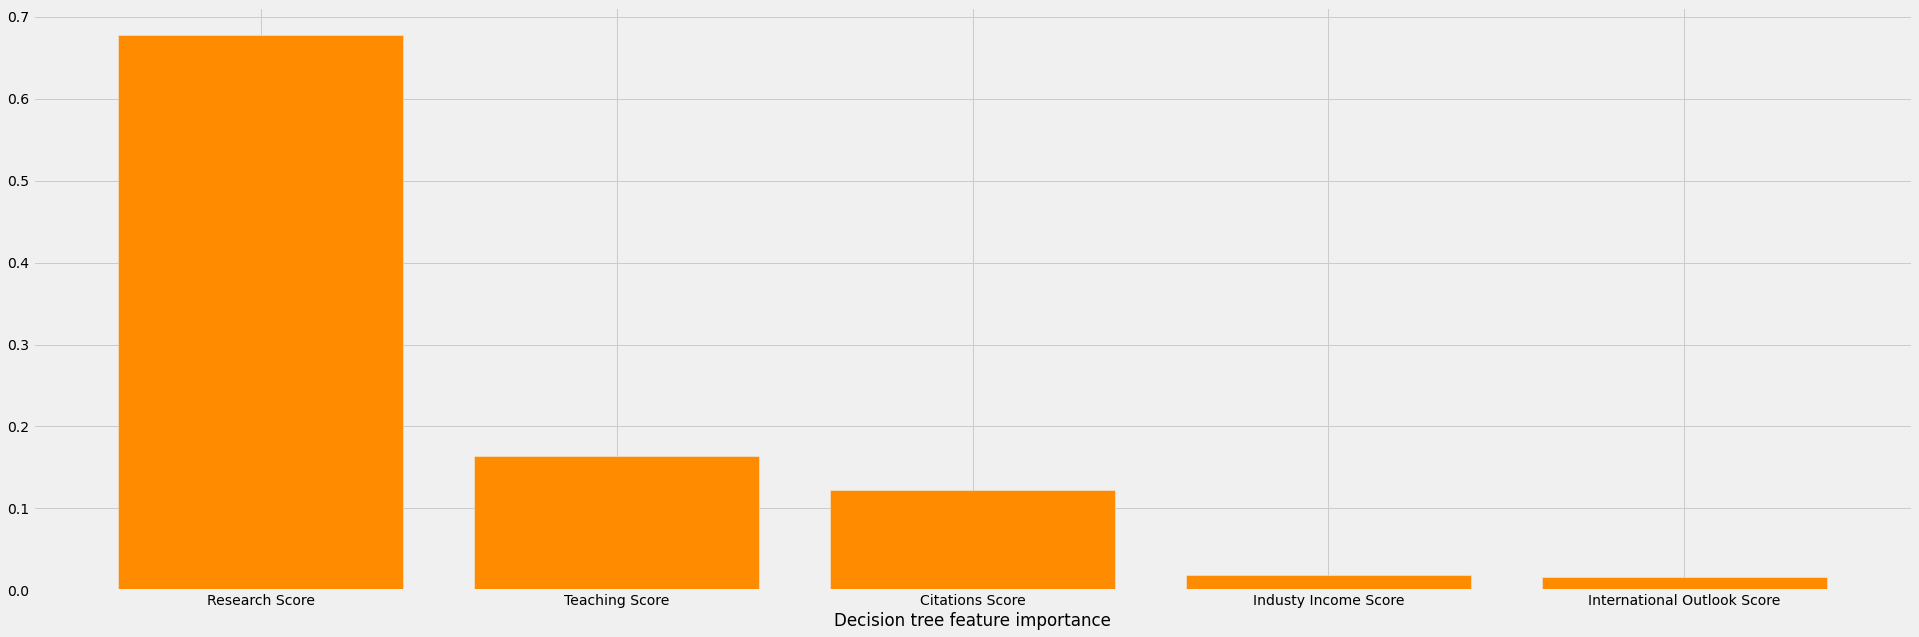

In [ ]:
# plotting feature importance of the decision_tree

plt.figure(figsize=(30,10))
plt.bar(dt_feature_imp.index,dt_feature_imp, color = "darkorange")
plt.xlabel("Decision tree feature importance")

plt.show()


## Random Forest Classifier

In [ ]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

#fitting the data
clf.fit(X_train, y_train)

#predicting
y_pred = clf.predict(X_test)


y_pred_train = clf.predict(X_train)

<ipython-input-271-6097540de6e0>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


### K Fold cross validation and metrics

In [ ]:
from sklearn.model_selection import StratifiedKFold

strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []
scores_training =[]
for k, (train, test) in enumerate(kfold):
  clf.fit(X_train.iloc[train, :], y_train.iloc[train])
  score = clf.score(X_train.iloc[test, :], y_train.iloc[test])
  sc_train = clf.score(X_train.iloc[train, :], y_train.iloc[train])
  scores.append(score)
  scores_training.append(sc_train)
  # print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))

print('\n\nCross-Validation Testing accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('\n\nCross-Validation Training accuracy: %.3f +/- %.3f' %(np.mean(scores_training), np.std(scores_training)))

<ipython-input-272-66b995037615>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train.iloc[train, :], y_train.iloc[train])
<ipython-input-272-66b995037615>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train.iloc[train, :], y_train.iloc[train])
<ipython-input-272-66b995037615>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train.iloc[train, :], y_train.iloc[train])
<ipython-input-272-66b995037615>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train.iloc[train, :], y_train.iloc[train])
<ipython-input-2



Cross-Validation Testing accuracy: 0.981 +/- 0.014


Cross-Validation Training accuracy: 1.000 +/- 0.000


In [ ]:

print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))



Cross-Validation accuracy: 0.981 +/- 0.014


In [ ]:
#accuracy of model
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test,y_pred )

1.0

In [ ]:
report = classification_report(y_test, y_pred)

print(report)

# f1 score metrics
f1_score_value = f1_score(y_test,y_pred,average='weighted')
print("F1 score : ", f1_score_value)

# precision metrics
precision_score_value = precision_score(y_test,y_pred,average='weighted')
print("Precision score : ", precision_score_value)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        94
           2       1.00      1.00      1.00        16

    accuracy                           1.00       121
   macro avg       1.00      1.00      1.00       121
weighted avg       1.00      1.00      1.00       121

F1 score :  1.0
Precision score :  1.0


### Random Forest feature importance

In [ ]:
random_forest_feature_scores = pd.Series(clf.feature_importances_, index=['Overall Score', 	'Teaching Score', 	'Research Score' 	,'Citations Score', 	'Industy Income Score', 	'International Outlook Score']).sort_values(ascending=False)

random_forest_feature_scores

Overall Score                  0.419528
Research Score                 0.301470
Teaching Score                 0.180998
Citations Score                0.062494
International Outlook Score    0.021066
Industy Income Score           0.014444
dtype: float64

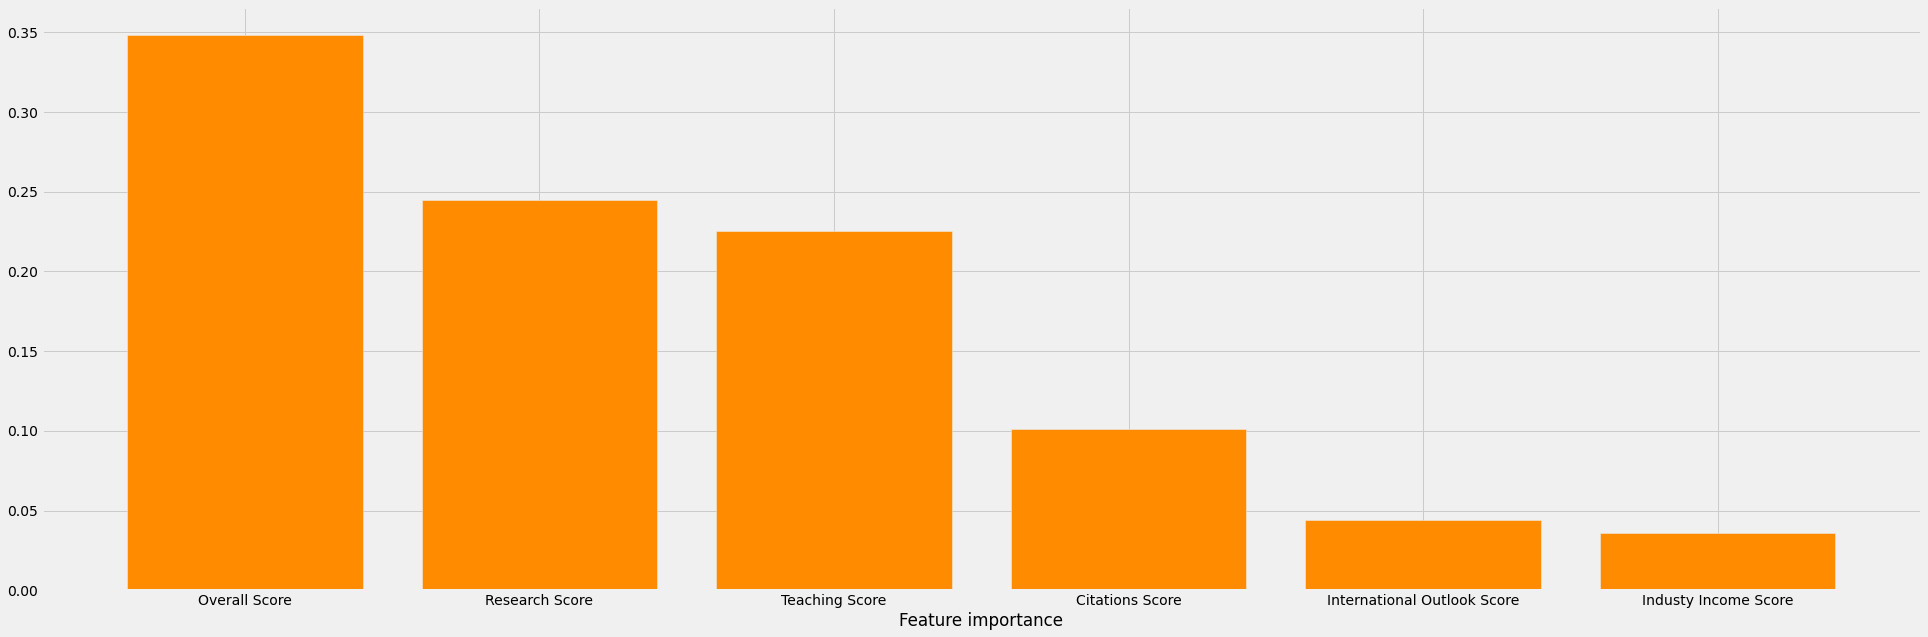

In [ ]:
# plotting feature importance of the Random Forest

plt.figure(figsize=(30, 10))
plt.bar(random_forest_feature_scores.index, random_forest_feature_scores, color = "darkorange")
plt.xlabel("Feature importance")

plt.show()


## Hyper parameter tuning

In [ ]:
from scipy.stats import randint

clf=RandomForestClassifier()

parameters = {
    "max_depth": [3, 5, 10, None],
    "n_estimators": [100, 200, 300, 400, 500],
    "max_features": randint(1, 3),
    "criterion": ["gini", "entropy"],
    "bootstrap": [True, False],
    "min_samples_leaf": randint(1, 4)
}

# parameters = {
#     "max_depth": [3, 5, 10, None],
#     "n_estimators": [100, 200, 300, 400, 500]
# }

optimal_model = RandomizedSearchCV(clf,
                        param_distributions=parameters,
                        n_iter=2,
                        cv=3,
                        n_jobs=-1,
                        )

optimal_model.fit(features, y)



RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=2,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f97d1b01b80>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f97d199b070>,
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [ ]:
optimal_model.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 2,
 'min_samples_leaf': 2,
 'n_estimators': 100}

In [ ]:
clf=RandomForestClassifier(bootstrap=False,criterion='gini',max_depth=None,max_features=1,min_samples_leaf=1,n_estimators=300)
clf.fit(X_train,y_train)
#predicting
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

<ipython-input-280-338a82bb47d5>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


### K Fold cross validation and metrics

In [ ]:
from sklearn.model_selection import StratifiedKFold

strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []
scores_training =[]
for k, (train, test) in enumerate(kfold):
  clf.fit(X_train.iloc[train, :], y_train.iloc[train])
  score = clf.score(X_train.iloc[test, :], y_train.iloc[test])
  sc_train = clf.score(X_train.iloc[train, :], y_train.iloc[train])
  scores.append(score)
  scores_training.append(sc_train)
  # print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))

print('\n\nCross-Validation Testing accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('\n\nCross-Validation Training accuracy: %.3f +/- %.3f' %(np.mean(scores_training), np.std(scores_training)))

<ipython-input-281-66b995037615>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train.iloc[train, :], y_train.iloc[train])
<ipython-input-281-66b995037615>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train.iloc[train, :], y_train.iloc[train])
<ipython-input-281-66b995037615>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train.iloc[train, :], y_train.iloc[train])
<ipython-input-281-66b995037615>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train.iloc[train, :], y_train.iloc[train])
<ipython-input-2



Cross-Validation Testing accuracy: 0.979 +/- 0.016


Cross-Validation Training accuracy: 1.000 +/- 0.000


In [ ]:

print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))



Cross-Validation accuracy: 0.979 +/- 0.016


In [ ]:
#accuracy of model
from sklearn.metrics import accuracy_score, confusion_matrix

print("Testing accuracy " ,accuracy_score(y_test,y_pred))

print("Training accuracy " ,accuracy_score(y_train,y_pred_train))


Testing accuracy  1.0
Training accuracy  1.0


In [ ]:
report = classification_report(y_test, y_pred)

print(report)

# f1 score metrics
f1_score_value = f1_score(y_test,y_pred,average='weighted')
print("F1 score : ", f1_score_value)

# precision metrics
precision_score_value = precision_score(y_test,y_pred,average='weighted')
print("Precision score : ", precision_score_value)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        94
           2       1.00      1.00      1.00        16

    accuracy                           1.00       121
   macro avg       1.00      1.00      1.00       121
weighted avg       1.00      1.00      1.00       121

F1 score :  1.0
Precision score :  1.0


### Random Forest feature importance

In [ ]:
random_forest_feature_scores = pd.Series(clf.feature_importances_, index=['Overall Score', 	'Teaching Score', 	'Research Score' 	,'Citations Score', 	'Industy Income Score', 	'International Outlook Score']).sort_values(ascending=False)

random_forest_feature_scores

Overall Score                  0.348424
Research Score                 0.244638
Teaching Score                 0.225457
Citations Score                0.101269
International Outlook Score    0.043968
Industy Income Score           0.036244
dtype: float64

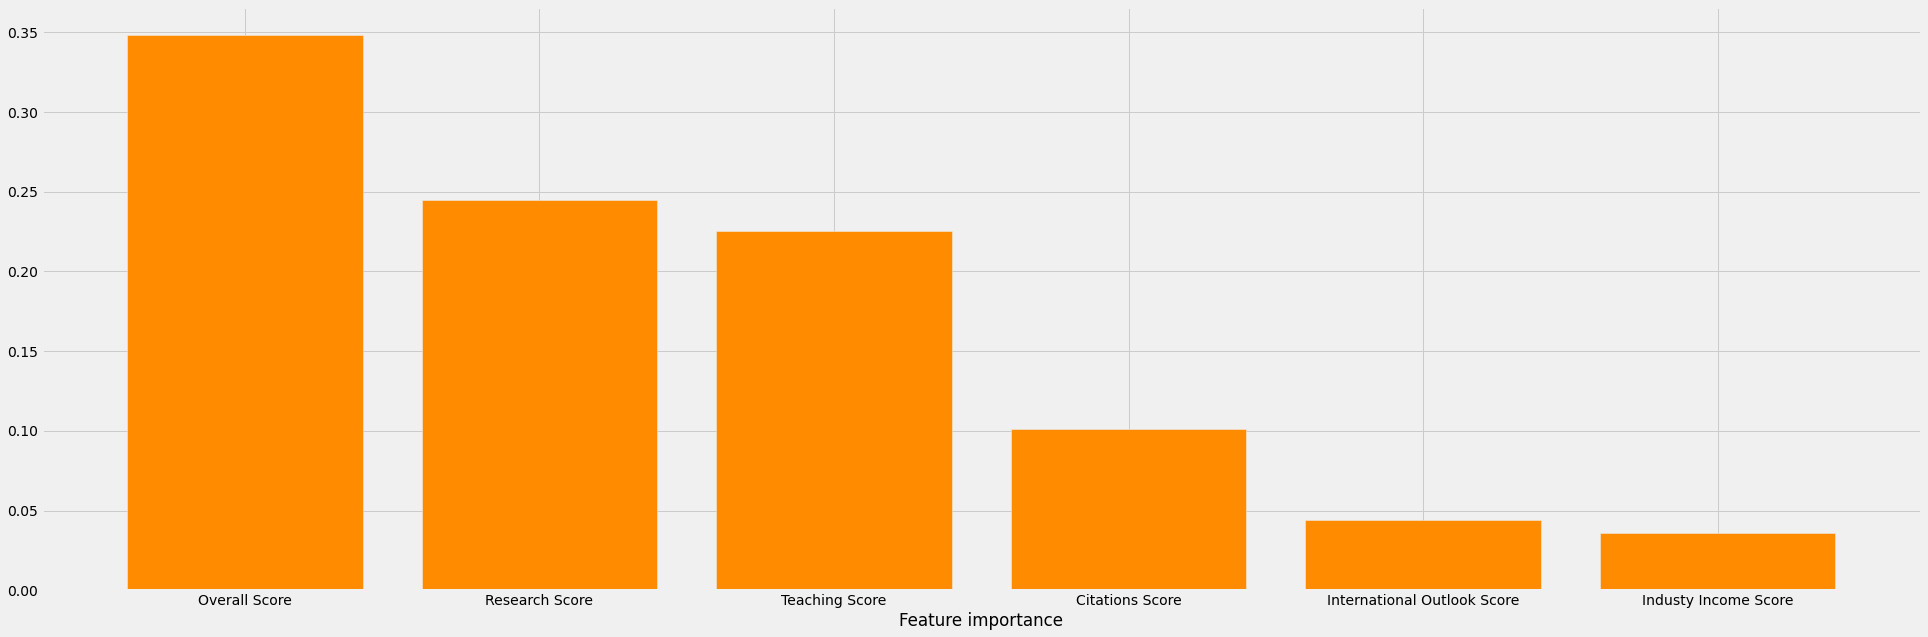

In [ ]:
# plotting feature importance of the Random Forest

plt.figure(figsize=(30, 10))
plt.bar(random_forest_feature_scores.index, random_forest_feature_scores, color = "darkorange")
plt.xlabel("Feature importance")

plt.show()


# Predicting for 2023


In [ ]:
#df_2023

features = df_2023.drop(['Ranking ','Year','University','Country'],axis=1)
# label_data = labels

In [ ]:
features['Overall Score'] =features['Overall Score'].replace('51.2–54.3','51.2')

In [ ]:
label_data = clf.predict(features)

In [ ]:
label_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
labels = []
# Original form is  ['High' 'Low' 'Medium']
# Encoded labels are  [0, 1, 2]  respectively
for i in label_data:
  if(i==0):
    labels.append('High')
  if(i==1):
    labels.append('Low')
  if(i==2):
    labels.append('Medium')


In [ ]:
df_2023['Output'] = labels

<ipython-input-292-6dcb22b529cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['Output'] = labels


In [ ]:
df_2023[0:50]

,Year,Ranking,University,Country,Overall Score,Teaching Score,Research Score,Citations Score,Industy Income Score,International Outlook Score,Output
0,2023,1,University of Oxford,United Kingdom,96.4,92.3,99.7,99.0,74.9,96.2,High
1,2023,2,Harvard University,United States,95.2,94.8,99.0,99.3,49.5,80.5,High
2,2023,3,University of Cambridge,United Kingdom,94.8,90.9,99.5,97.0,54.2,95.8,High
3,2023,3,Stanford University,United States,94.8,94.2,96.7,99.8,65.0,79.8,High
4,2023,5,Massachusetts Institute of Technology,United States,94.2,90.7,93.6,99.8,90.9,89.3,High
5,2023,6,California Institute of Technology,United States,94.1,90.9,97.0,97.3,89.8,83.6,High
6,2023,7,Princeton University,United States,92.4,87.6,95.9,99.1,66.0,80.3,High
7,2023,8,"University of California, Berkeley",United States,92.1,86.4,95.8,99.0,76.8,78.4,High
8,2023,9,Yale University,United States,91.4,92.6,92.7,97.0,55.0,70.9,High
9,2023,10,Imperial College London,United Kingdom,90.4,82.8,90.8,98.3,59.8,97.5,High
